# Aplikasi dari Aljabar Linier dengan PageRank

Algoritma PageRank diperkenalkan oleh Lary Page, salah satu pendiri Google, dan pertama kali digunakan untuk menentukan peringkat halaman web di mesin pencari Google. Saat ini, algoritma PageRank semakin banyak digunakan di berbagai bidang, misalnya dalam memberi peringkat pengguna di media sosial, dll.

## Algoritma PageRank
Jika kita membuat halaman web *i* dan menyertakan tautan link ke halaman web *j* , ini berarti kita menganggap *j* penting dan relevan dengan topik kita. Jika ada banyak halaman yang tertaut ke *j* , berarti ada anggapan umum bahwa halaman *j* itu penting. Sebaliknya, jika *j* hanya memiliki satu backlink, namun berasal dari situs resmi *k* , (seperti www.google.com) kita katakan bahwa *k* mentransfer *otoritas*nya ke *j*. Dengan kata lain, *k* menegaskan bahwa *j* itu penting.

Dalam graph berarah, node diwakili oleh halaman web dan edgenya diwakili oleh tautan link di antara web-web. Seperti pada contoh di bawah ini.

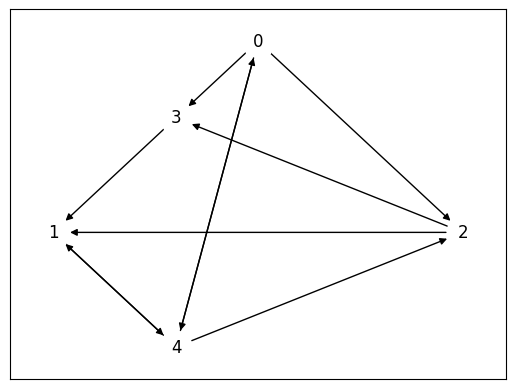

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
nodes = np.arange(0, 5).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,2),(0,3),(0,4),(1, 4),(2, 1),(2, 3),(3,1),(4,0),(4,1),(4,2)])
pos = {0:(10, 10),
 1:(7.5, 7.5), 2:(12.5, 7.5),
 3:(9, 9), 4:(9, 6)}
labels = {0:'0',
 1:'1', 2: '2',
 3: '3', 4: '4'}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True, node_shape = 's', node_color = 'white')
plt.show()

Berikut adalah algoritma PageRank:

1. Misalkan ada empat halaman web: 0, 1, 2, 3, dan 4.
2. PageRank diinisialisasi ke nilai yang sama untuk semua halaman. Dalam bentuk asli PageRank, jumlah PageRank di semua halaman adalah jumlah total halaman web pada saat itu, jadi setiap halaman dalam contoh ini akan memiliki nilai awal 1. Namun, versi PageRank selanjutnya, dan sisa bagian ini, mengasumsikan distribusi probabilitas antara 0 dan 1. Oleh karena itu, nilai awal untuk setiap halaman dalam contoh ini adalah 0,2.
3. PageRank yang ditransfer dari suatu halaman ke target tautan keluarnya pada iterasi berikutnya dibagi sama rata di antara semua tautan keluar.
4. PageRank yang diberikan oleh tautan keluar sama dengan skor PageRank dokumen itu sendiri dibagi dengan jumlah tautan keluar $L$.
5. Langkah-langkah mungkin memerlukan beberapa iterasi untuk mendapatkan nilai PageRank yang akurat.

## Contoh Pengerjaan

$ A =
 \begin{bmatrix}
  0 & 0 & 0 & 0 & \frac{1}{3}\\
  0 & 0 & \frac{1}{2} & 1 & \frac{1}{3}\\
  \frac{1}{3} & 0 & 0 & 0 & \frac{1}{3}\\
  \frac{1}{3} & 0 & \frac{1}{2} & 0 & 0\\
  \frac{1}{3} & 1 & 0 & 0 & 0
 \end{bmatrix},
$
$ X_0 =
 \begin{bmatrix}
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}
 \end{bmatrix}
$

<br>

Menghasilkan $X_1$ dimana $X_1=AX_0$

$ X_1 =
 \begin{bmatrix}
  0 & 0 & 0 & 0 & \frac{1}{3}\\
  0 & 0 & \frac{1}{2} & 1 & \frac{1}{3}\\
  \frac{1}{3} & 0 & 0 & 0 & \frac{1}{3}\\
  \frac{1}{3} & 0 & \frac{1}{2} & 0 & 0\\
  \frac{1}{3} & 1 & 0 & 0 & 0
 \end{bmatrix}
 \begin{bmatrix}
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}\\
  \frac{1}{5}
 \end{bmatrix}
$
$=
 \begin{bmatrix}
  0.06666667\\
  0.36666667\\
  0.13333333\\
  0.16666667\\
  0.26666667
 \end{bmatrix}
$

<br>

Terdapat batasan(a) dimana a < 0.01. Maksudnya, jika $|V_{i+1}-V_i|$ < 0.01, maka dari $V_i+1$ sudah bisa ditentukan peringkatnya yang didasarkan angka tertinggi menduduki peringkat pertama.

Cara menghitungnya yaitu:<br>
$(0.06666667-0.2)^2+(0.36666667-0.2)^2+(0.13333333-0.2)^2+(0.16666667-0.2)^2+(0.26666667-0.2)^2 = 0.05555555555555557$

<br><br>

Namun penghitungan di atas belum memenuhi batasannya. Maka akan ada vektor baru lagi yang merupakan perkalian dari vektor sebelumna dengan matriks A. Jika sudah memenuhi batasan, maka bisa ditarik kesimpulan.<br><br>

$ X_2 =
 \begin{bmatrix}
  0 & 0 & 0 & 0 & \frac{1}{3}\\
  0 & 0 & \frac{1}{2} & 1 & \frac{1}{3}\\
  \frac{1}{3} & 0 & 0 & 0 & \frac{1}{3}\\
  \frac{1}{3} & 0 & \frac{1}{2} & 0 & 0\\
  \frac{1}{3} & 1 & 0 & 0 & 0
 \end{bmatrix}
 \begin{bmatrix}
  0.06666667\\
  0.36666667\\
  0.13333333\\
  0.16666667\\
  0.26666667
 \end{bmatrix}
$
$=
 \begin{bmatrix}
  0.08888889\\
  0.32222222\\
  0.11111111\\
  0.08888889\\
  0.38888889
 \end{bmatrix}
$

$(0.08888889-0.2)^2+(0.32222222-0.2)^2+(0.11111111-0.2)^2+(0.08888889-0.2)^2+(0.38888889-0.2)^2 = 0.023950617283950627 < 0.01$ (tidak memenuhi)

<br><br>

$ X_3 =
 \begin{bmatrix}
  0 & 0 & 0 & 0 & \frac{1}{3}\\
  0 & 0 & \frac{1}{2} & 1 & \frac{1}{3}\\
  \frac{1}{3} & 0 & 0 & 0 & \frac{1}{3}\\
  \frac{1}{3} & 0 & \frac{1}{2} & 0 & 0\\
  \frac{1}{3} & 1 & 0 & 0 & 0
 \end{bmatrix}
 \begin{bmatrix}
  0.08888889\\
  0.32222222\\
  0.11111111\\
  0.08888889\\
  0.38888889
 \end{bmatrix}
$
$=
 \begin{bmatrix}
  0.12962963\\
  0.27407407\\
  0.15925926\\
  0.08518519\\
  0.35185185
 \end{bmatrix}
$

$(0.12962963-0.2)^2+(0.27407407-0.2)^2+(0.15925926-0.2)^2+(0.08518519-0.2)^2+(0.35185185-0.2)^2 = 0.007681755829903978 < 0.01$ (memenuhi)

<br><br>

Maka dari vektor terakhir, dapat disimpulkan bahwa web 4 berada di peringkat teratas dan web 3 berada di peringkat terendah.

## Kode Python dan Numpy

In [2]:
import numpy as np

def kondisi(V0, V1):
  a = 0
  for i in range(0,len(V0)):
    a += ((V1[i] - V0[i]) ** 2)
  return a[0]

def kali(mat, V0, V1):
  a = kondisi(V0, V1)
  v = 2
  print(a, "< 0.01")
  print()
  while a >= 0.01:
    new = np.dot(mat, V1)
    a = kondisi(V1, new)
    print(f"V{v}")
    print(new)
    print()
    print(a, "< 0.01")
    print()
    V1 = new
    v+=1

A = np.array([[0,0,0,0,1/3],[0,0,1/2,1,1/3],[1/3,0,0,0,1/3],[1/3,0,1/2,0,0],[1/3,1,0,0,0]])
print("Matriks A =")
print(A)
print()
V0 = np.array([[1/5],[1/5],[1/5],[1/5],[1/5]])
print("V0")
print(V0)
print()
V1 = A @ V0
print("V1")
print(V1)
print()

kali(A, V0, V1)

Matriks A =
[[0.         0.         0.         0.         0.33333333]
 [0.         0.         0.5        1.         0.33333333]
 [0.33333333 0.         0.         0.         0.33333333]
 [0.33333333 0.         0.5        0.         0.        ]
 [0.33333333 1.         0.         0.         0.        ]]

V0
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]

V1
[[0.06666667]
 [0.36666667]
 [0.13333333]
 [0.16666667]
 [0.26666667]]

0.05555555555555557 < 0.01

V2
[[0.08888889]
 [0.32222222]
 [0.11111111]
 [0.08888889]
 [0.38888889]]

0.023950617283950627 < 0.01

V3
[[0.12962963]
 [0.27407407]
 [0.15925926]
 [0.08518519]
 [0.35185185]]

0.007681755829903978 < 0.01

